# Mission 2. 패션 스타일 선호 여부 예측
> 2-1. 주어진 라벨링 데이터의 파일 명은 아래와 같은 형식이다.<br>
> "{W/T}\_{이미지ID}\_{시대별}\_{스타일별}\_{성별}\_{설문ID}.json"<br>
> 이에 기반하여 "설문ID" 수 기준으로 "성별&스타일" 통계치를 아래 표 형식으로 기입한다.

In [1]:
# 필요 라이브러리 import
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.style.use('default')
pd.options.display.max_columns = 100

# 데이터셋 경로 설정
train_label_path = "../dataset/training_label"
val_label_path = "../dataset/validation_label"
filtered_train = "../filtered_labels/training_label"
filtered_val = "../filtered_labels/validation_label"

## 모든 데이터에 대해서 확인
> Mission2에서는 이미지ID를 식별하여 존재하는 이미지 데이터만을 대상으로 통계치를 구해야 한다(labeling 데이터가 image에 비해 훨씬 많다).<br>
> 그 전에 우선은 전체 데이터에 대해서도 한 번 확인해보자.

In [2]:
# train과 validation 데이터셋의 라벨링 수를 확인
print(f"train image: {len(os.listdir(train_label_path))}, validation image: {len(os.listdir(val_label_path))}")

train image: 211346, validation image: 36383


In [3]:
# 폴더 내부의 파일 정보를 분류하는 함수
def summarize_metadata(img_path):
    file_list = os.listdir(img_path)

    # defaultdict를 사용하여 정보를 저장할 데이터 format 형성
    data = defaultdict(lambda: {"style": defaultdict(int)})

    # 각 파일에 대한 정보를 data에 순차적으로 저장
    for img in file_list:
        # 'json' 파일만 처리
        if img.endswith(".json"):
            img_info = img.split("_")
            gender = img_info[-2]
            style = img_info[-3]
        
            # 데이터 구조에 정보 저장
            data[gender]["style"][style] += 1

    # defaultdict를 일반 dict로 변환
    return {k: {"style": dict(v["style"])} for k, v in data.items()}

In [4]:
# train과 validation 데이터셋의 이미지 정보를 확인
train_label_metadata = summarize_metadata(train_label_path)
val_label_metadata = summarize_metadata(val_label_path)

In [5]:
# 결과 미리 확인
print(train_label_metadata)
print(val_label_metadata)

{'M': {'style': {'ivy': 9374, 'hiphop': 8754, 'normcore': 13107, 'bold': 9957, 'sportivecasual': 11070, 'metrosexual': 9002, 'mods': 8948, 'hippie': 8454}}, 'W': {'style': {'normcore': 9830, 'classic': 6558, 'sportivecasual': 12025, 'ecology': 3934, 'popart': 3298, 'minimal': 10980, 'lingerie': 2981, 'lounge': 4210, 'kitsch': 6346, 'hiphop': 2775, 'athleisure': 2883, 'genderless': 3503, 'oriental': 5221, 'cityglam': 5889, 'powersuit': 13058, 'grunge': 2028, 'bodyconscious': 4450, 'space': 3075, 'feminine': 11455, 'hippie': 6625, 'military': 2213, 'disco': 3491, 'punk': 5852}}}
{'M': {'style': {'normcore': 1801, 'sportivecasual': 1824, 'hiphop': 1530, 'ivy': 2129, 'metrosexual': 1439, 'bold': 1609, 'mods': 1770, 'hippie': 1785}}, 'W': {'style': {'classic': 1267, 'grunge': 375, 'popart': 617, 'sportivecasual': 2327, 'minimal': 1799, 'cityglam': 984, 'oriental': 882, 'normcore': 1393, 'ecology': 700, 'lounge': 530, 'lingerie': 439, 'hiphop': 454, 'athleisure': 521, 'genderless': 515, 'kit

In [6]:
# 성별 및 스타일 별 이미지 수 시각화 함수
def plot_metadata(metadata, title_name, figsize=(25, 10)):
    # json 형식의 데이터를 DataFrame으로 변환
    df_list = []
    for gender, styles in metadata.items():
        for style, count in styles["style"].items():
            df_list.append({'gender': gender, 'style': style, 'count': count})
    df = pd.DataFrame(df_list)
    df = df.sort_values('count', ascending=False).reset_index(drop=True)

    # 그래프 그리기
    plt.figure(figsize=figsize)
    sns.set_style('whitegrid')
    sns.barplot(x='style', y='count', hue='gender', data=df)
    plt.title(f'Count of {title_name} images by style and gender', fontsize=16)
    plt.xlabel('Style', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='gender', fontsize=15)
    plt.tight_layout()
    plt.show()

    return df

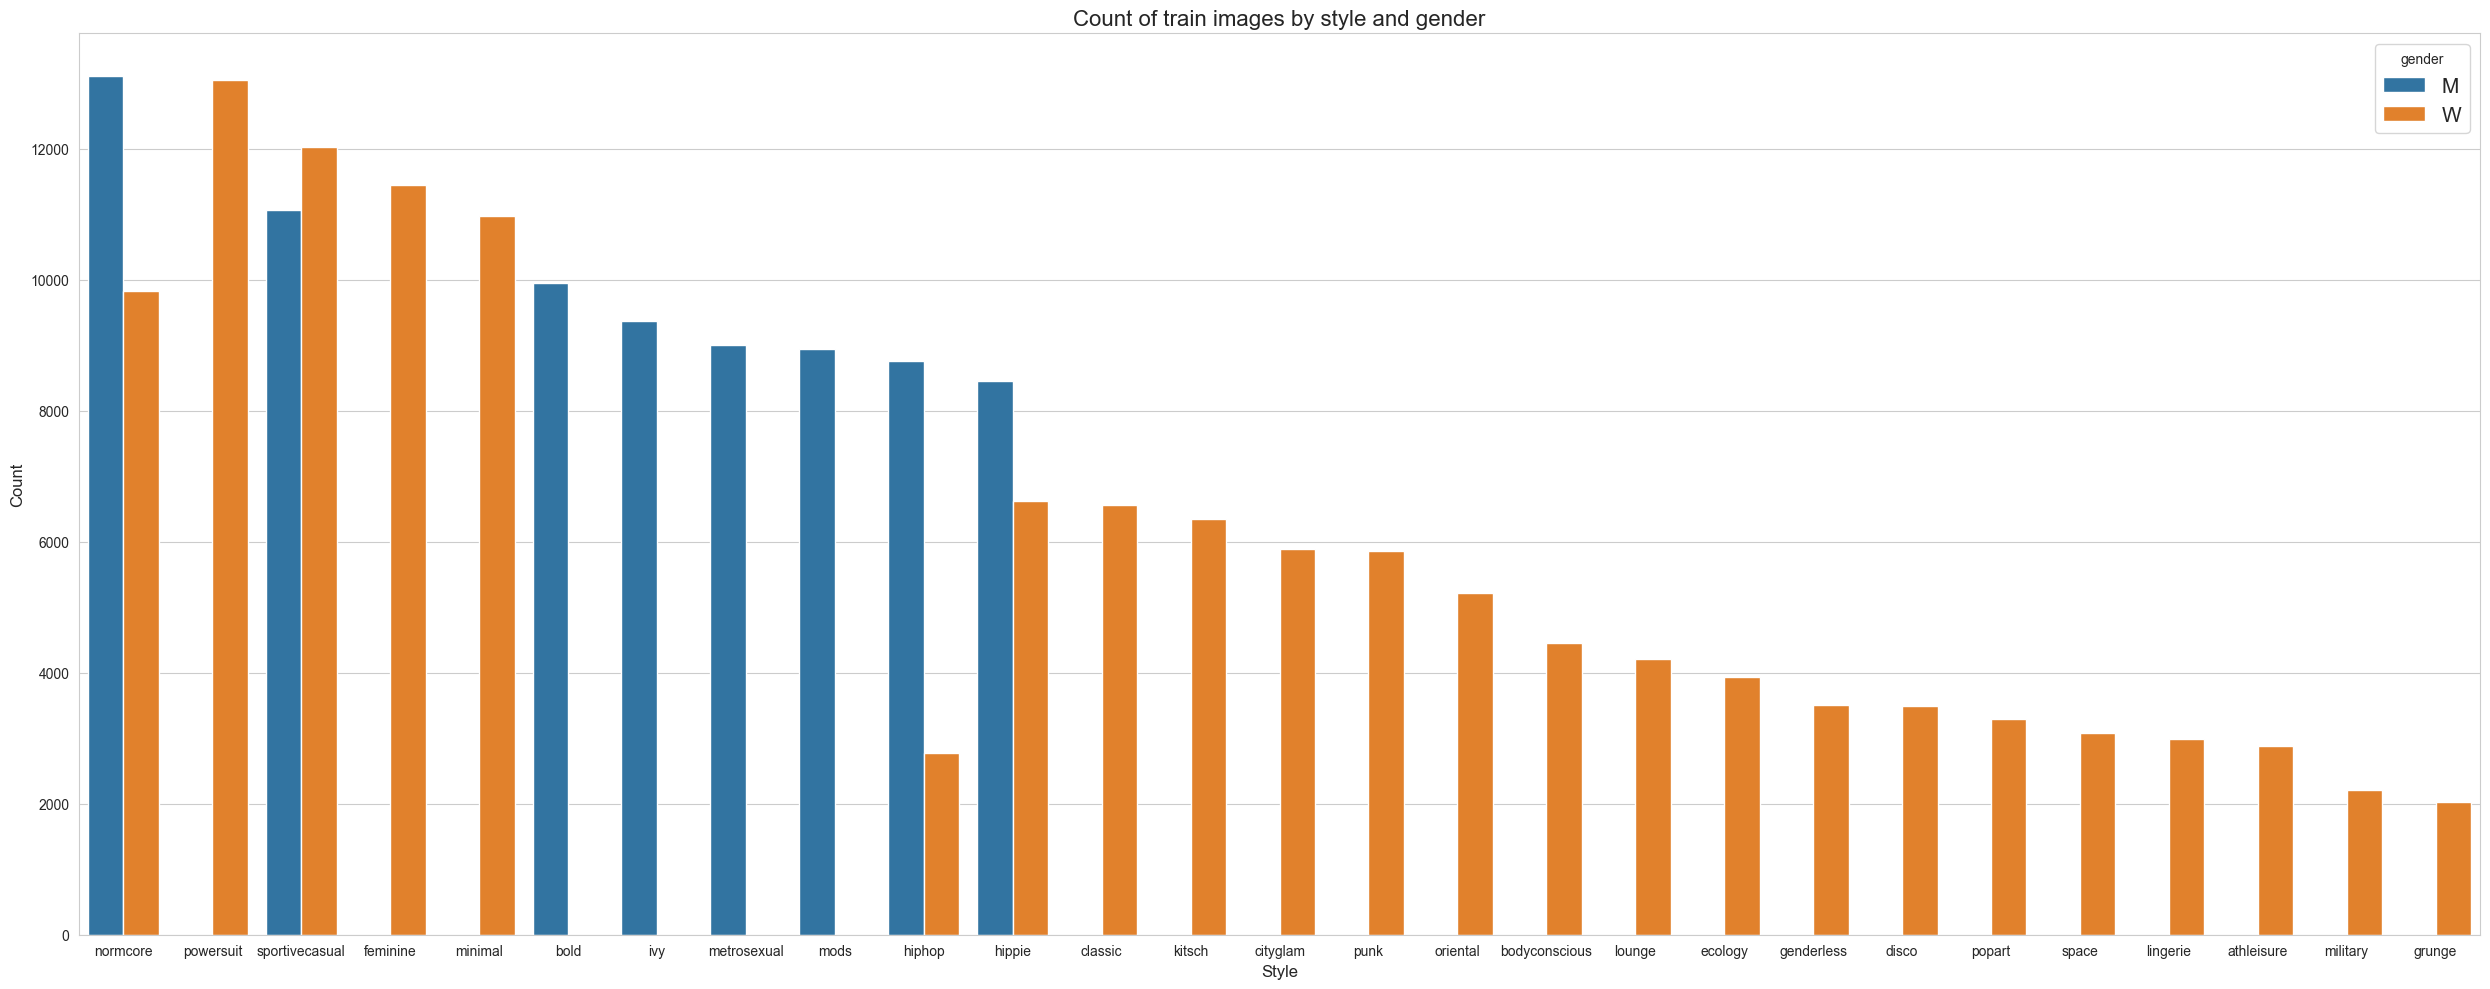

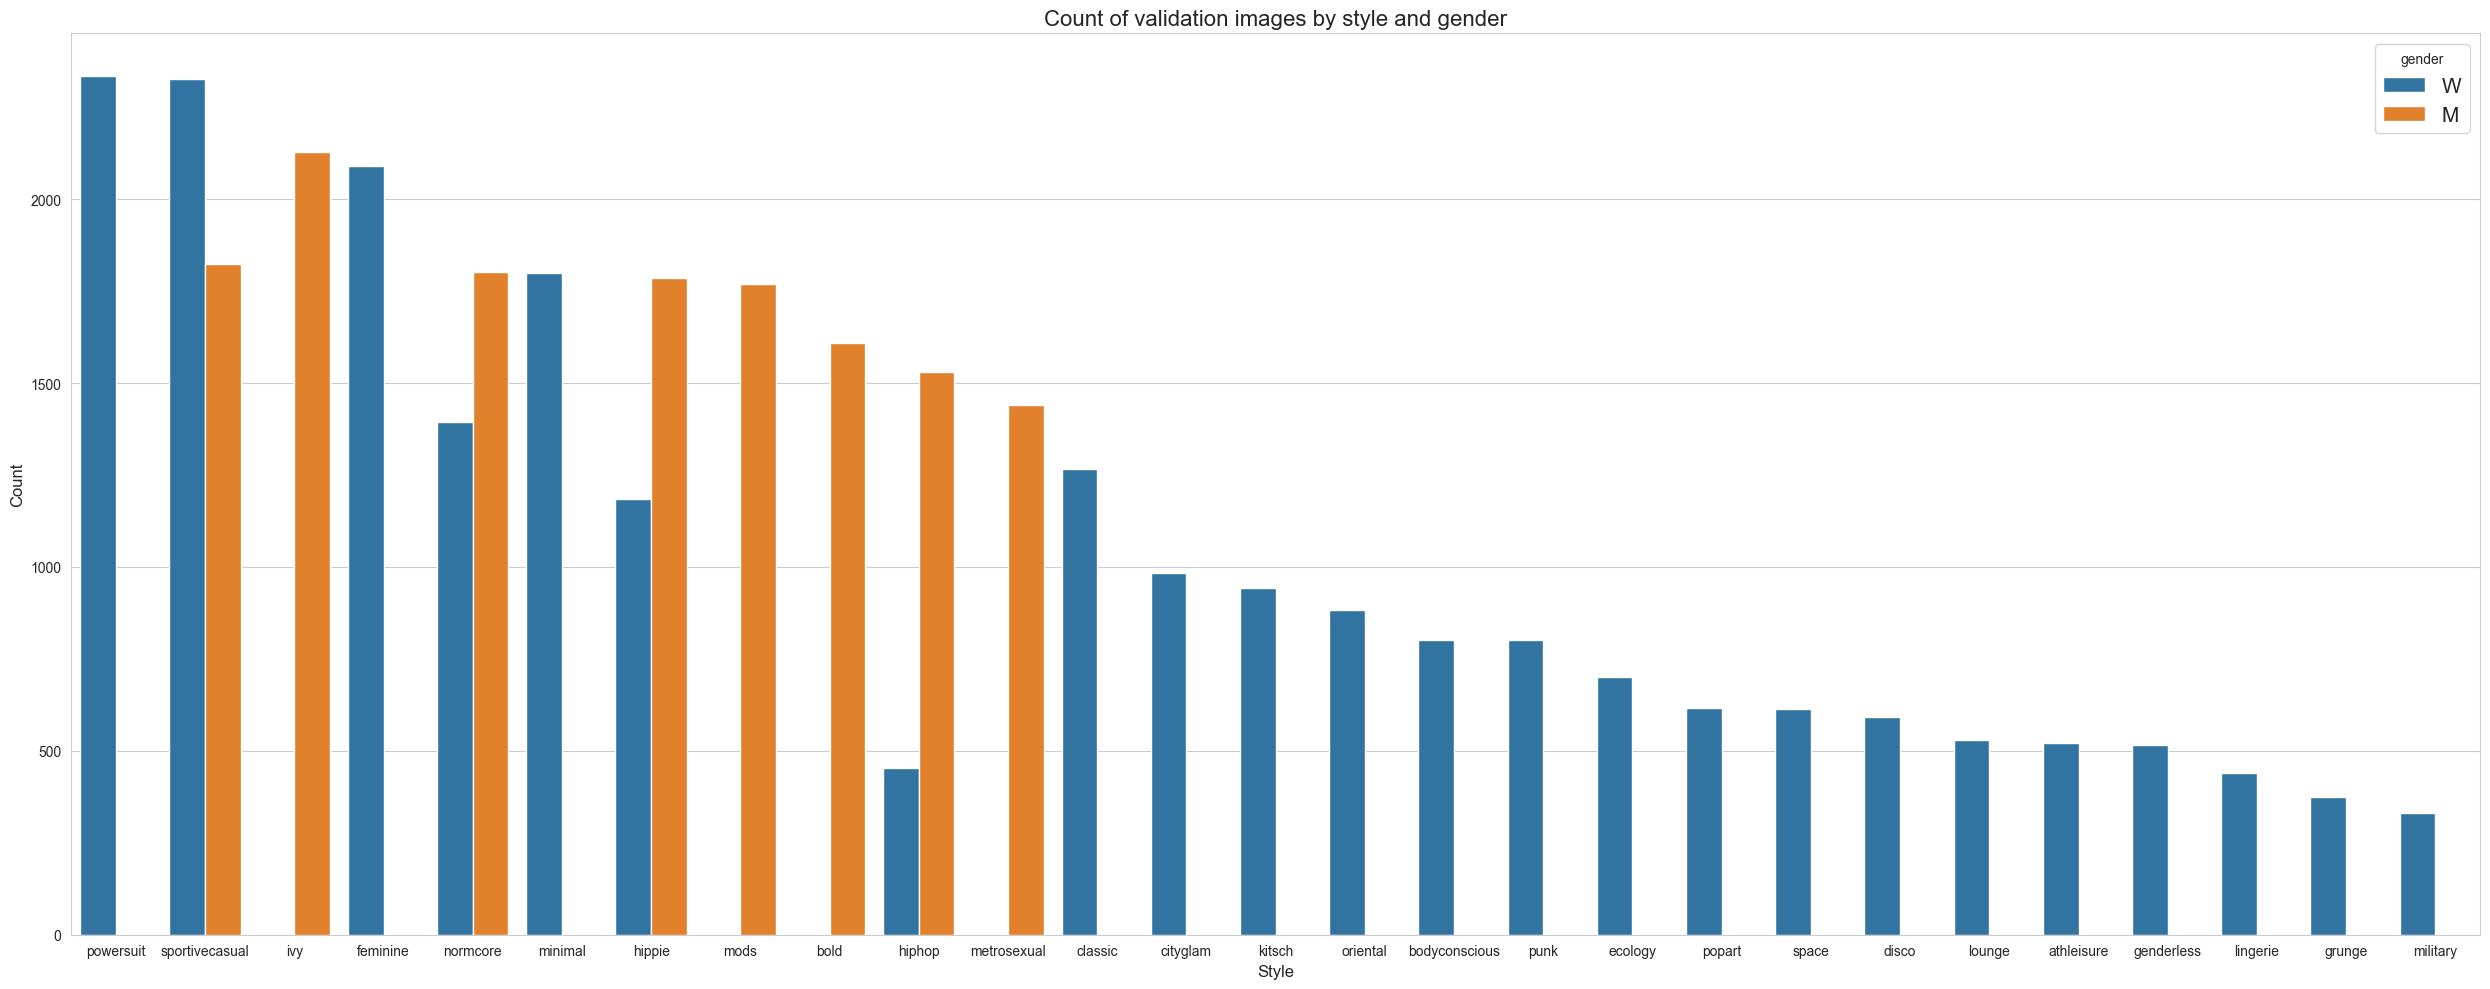

In [7]:
train_df = plot_metadata(train_label_metadata, title_name='train')
val_df = plot_metadata(val_label_metadata, title_name='validation')

In [8]:
# 결과 확인(세로로 너무 길게 보이길래 transpose 적용함)
train_df.groupby(by=['gender', 'style']).sum().T

gender     M                                                                \
style   bold hiphop hippie   ivy metrosexual  mods normcore sportivecasual   
count   9957   8754   8454  9374        9002  8948    13107          11070   

gender          W                                                        \
style  athleisure bodyconscious cityglam classic disco ecology feminine   
count        2883          4450     5889    6558  3491    3934    11455   

gender                                                                  \
style  genderless grunge hiphop hippie kitsch lingerie lounge military   
count        3503   2028   2775   6625   6346     2981   4210     2213   

gender                                                                        
style  minimal normcore oriental popart powersuit  punk space sportivecasual  
count    10980     9830     5221   3298     13058  5852  3075          12025

In [9]:
val_df.groupby(by=['gender', 'style']).sum().T

gender     M                                                                \
style   bold hiphop hippie   ivy metrosexual  mods normcore sportivecasual   
count   1609   1530   1785  2129        1439  1770     1801           1824   

gender          W                                                        \
style  athleisure bodyconscious cityglam classic disco ecology feminine   
count         521           802      984    1267   593     700     2091   

gender                                                                  \
style  genderless grunge hiphop hippie kitsch lingerie lounge military   
count         515    375    454   1185    942      439    530      332   

gender                                                                       
style  minimal normcore oriental popart powersuit punk space sportivecasual  
count     1799     1393      882    617      2334  800   614           2327

## 유효한 데이터만 확인

In [10]:
# train과 validation 데이터셋의 라벨링 수를 확인
print(f"train image: {len(os.listdir(filtered_train))}, validation image: {len(os.listdir(filtered_val))}")

train image: 20305, validation image: 4264


In [12]:
# 필터링된 데이터셋의 label 파일의 수 확인
remove_train_label = "../filtered_labels/training_label/invalid"
remove_val_label = "../filtered_labels/validation_label/invalid"
print(f"train image: {len(os.listdir(remove_train_label))}, validation image: {len(os.listdir(remove_val_label))}")

train image: 191042, validation image: 32120


In [13]:
# 폴더 내부의 파일 정보를 분류하는 함수
def summarize_metadata(img_path):
    file_list = os.listdir(img_path)

    # defaultdict를 사용하여 정보를 저장할 데이터 format 형성
    data = defaultdict(lambda: {"style": defaultdict(int)})

    # 각 파일에 대한 정보를 data에 순차적으로 저장
    for img in file_list:
        # 'json' 파일만 처리
        if img.endswith(".json"):
            img_info = img.split("_")
            gender = img_info[-2]
            style = img_info[-3]
        
            # 데이터 구조에 정보 저장
            data[gender]["style"][style] += 1

    # defaultdict를 일반 dict로 변환
    return {k: {"style": dict(v["style"])} for k, v in data.items()}

In [14]:
# train과 validation 데이터셋의 이미지 정보를 확인
train_label_metadata = summarize_metadata(filtered_train)
val_label_metadata = summarize_metadata(filtered_val)

In [15]:
# 결과 미리 확인
print(train_label_metadata)
print(val_label_metadata)

{'M': {'style': {'hiphop': 1321, 'normcore': 1096, 'sportivecasual': 1657, 'ivy': 1719, 'mods': 1616, 'metrosexual': 1226, 'bold': 1144, 'hippie': 1571}}, 'W': {'style': {'ecology': 295, 'popart': 195, 'classic': 504, 'normcore': 646, 'sportivecasual': 1143, 'lounge': 207, 'kitsch': 374, 'minimal': 780, 'athleisure': 424, 'genderless': 234, 'hiphop': 243, 'cityglam': 329, 'grunge': 122, 'oriental': 369, 'bodyconscious': 500, 'lingerie': 188, 'powersuit': 623, 'feminine': 762, 'hippie': 339, 'punk': 237, 'military': 115, 'disco': 141, 'space': 184}}}
{'W': {'style': {'popart': 38, 'classic': 117, 'sportivecasual': 278, 'normcore': 50, 'hiphop': 32, 'lounge': 20, 'ecology': 70, 'minimal': 171, 'cityglam': 65, 'powersuit': 160, 'oriental': 71, 'lingerie': 17, 'bodyconscious': 114, 'feminine': 208, 'space': 75, 'hippie': 46, 'grunge': 29, 'military': 32, 'genderless': 24, 'disco': 31, 'kitsch': 61, 'punk': 38, 'athleisure': 80}}, 'M': {'style': {'sportivecasual': 180, 'hiphop': 259, 'ivy':

In [16]:
# 성별 및 스타일 별 이미지 수 시각화 함수
def plot_metadata(metadata, title_name, figsize=(25, 10)):
    # json 형식의 데이터를 DataFrame으로 변환
    df_list = []
    for gender, styles in metadata.items():
        for style, count in styles["style"].items():
            df_list.append({'gender': gender, 'style': style, 'count': count})
    df = pd.DataFrame(df_list)
    df = df.sort_values('count', ascending=False).reset_index(drop=True)

    # 그래프 그리기
    plt.figure(figsize=figsize)
    sns.set_style('whitegrid')
    sns.barplot(x='style', y='count', hue='gender', data=df)
    plt.title(f'Count of {title_name} images by style and gender', fontsize=16)
    plt.xlabel('Style', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='gender', fontsize=15)
    plt.tight_layout()
    plt.show()

    return df

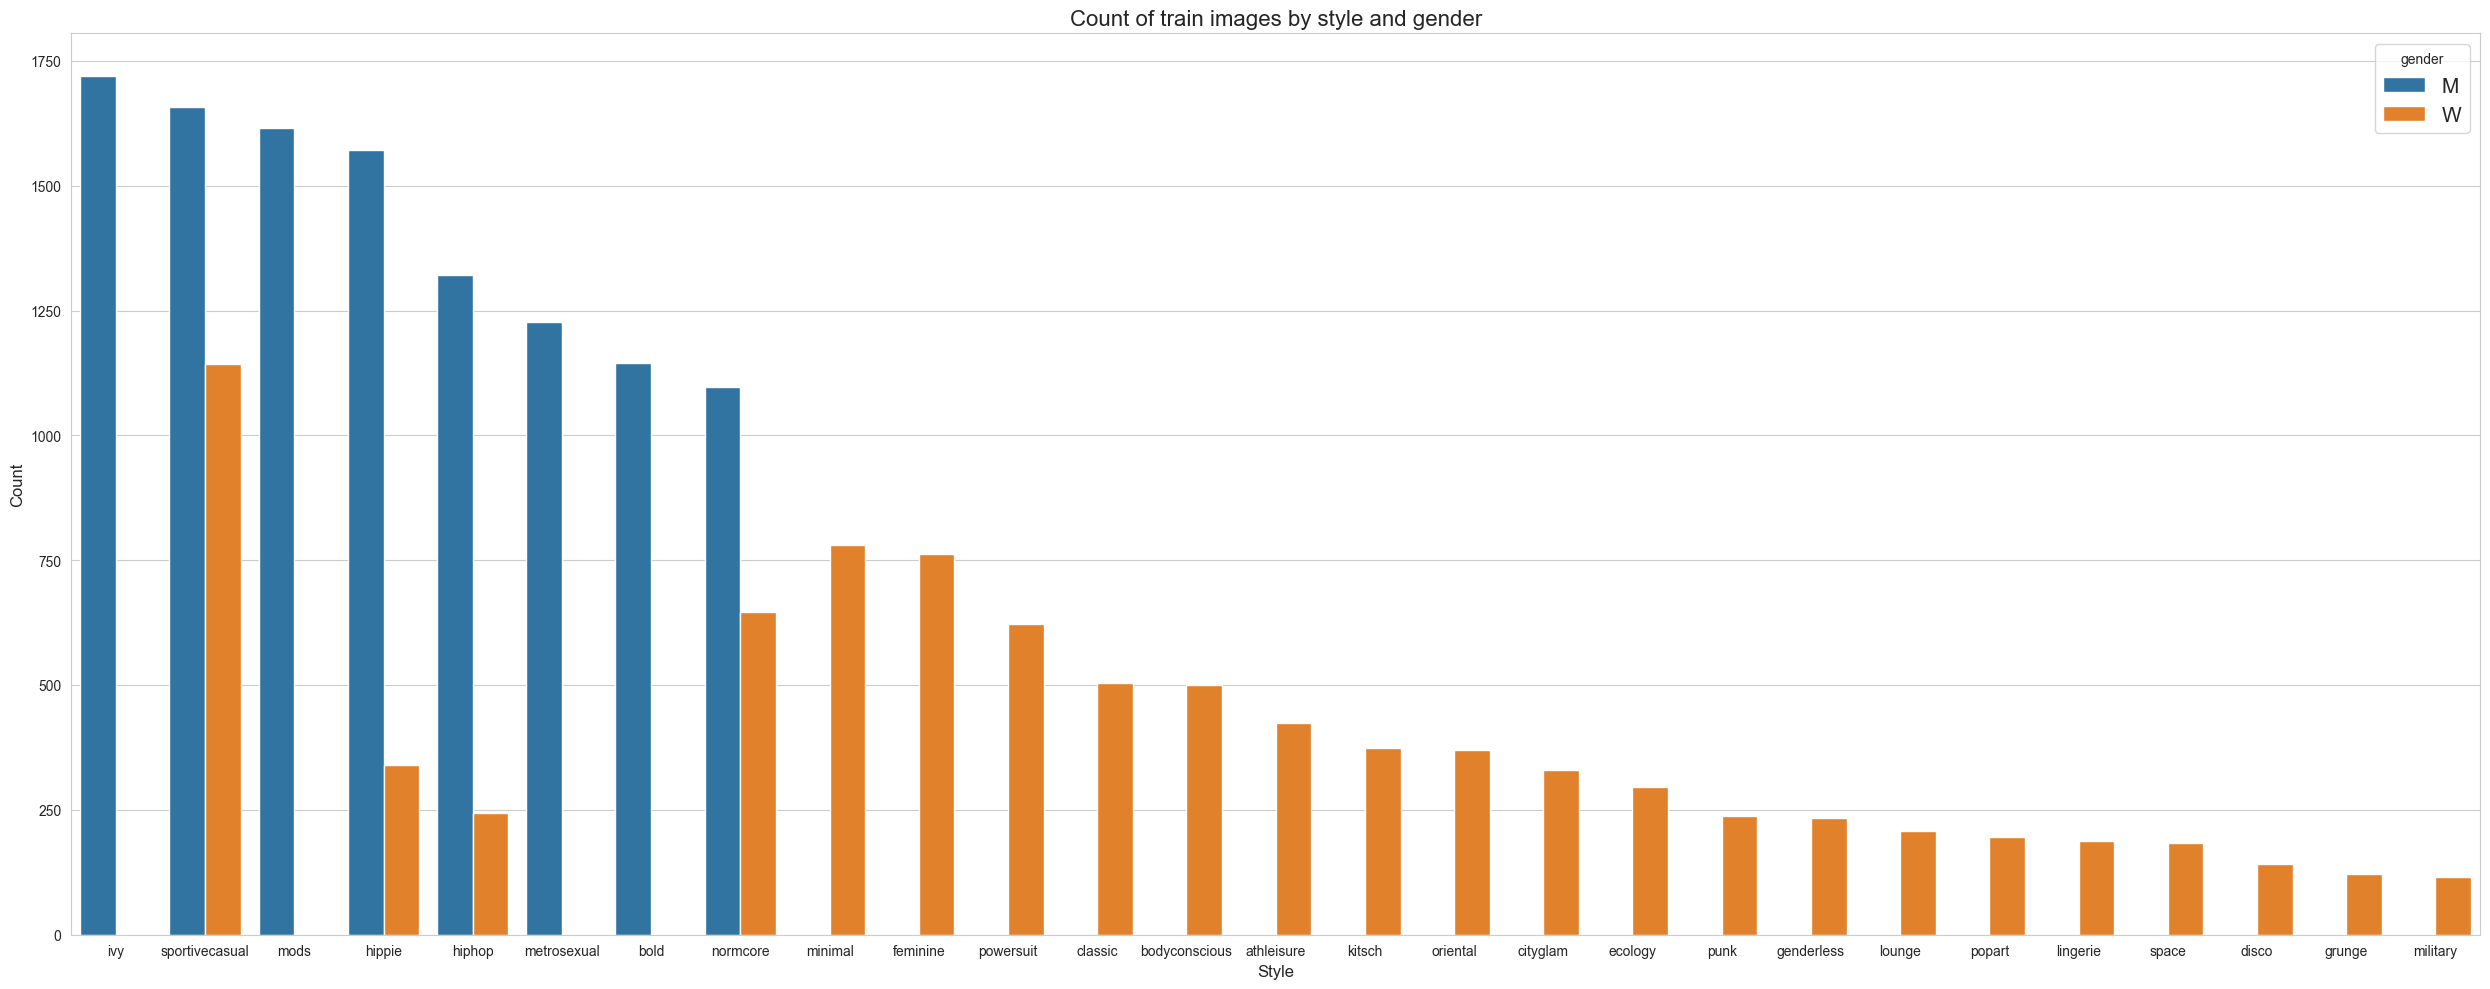

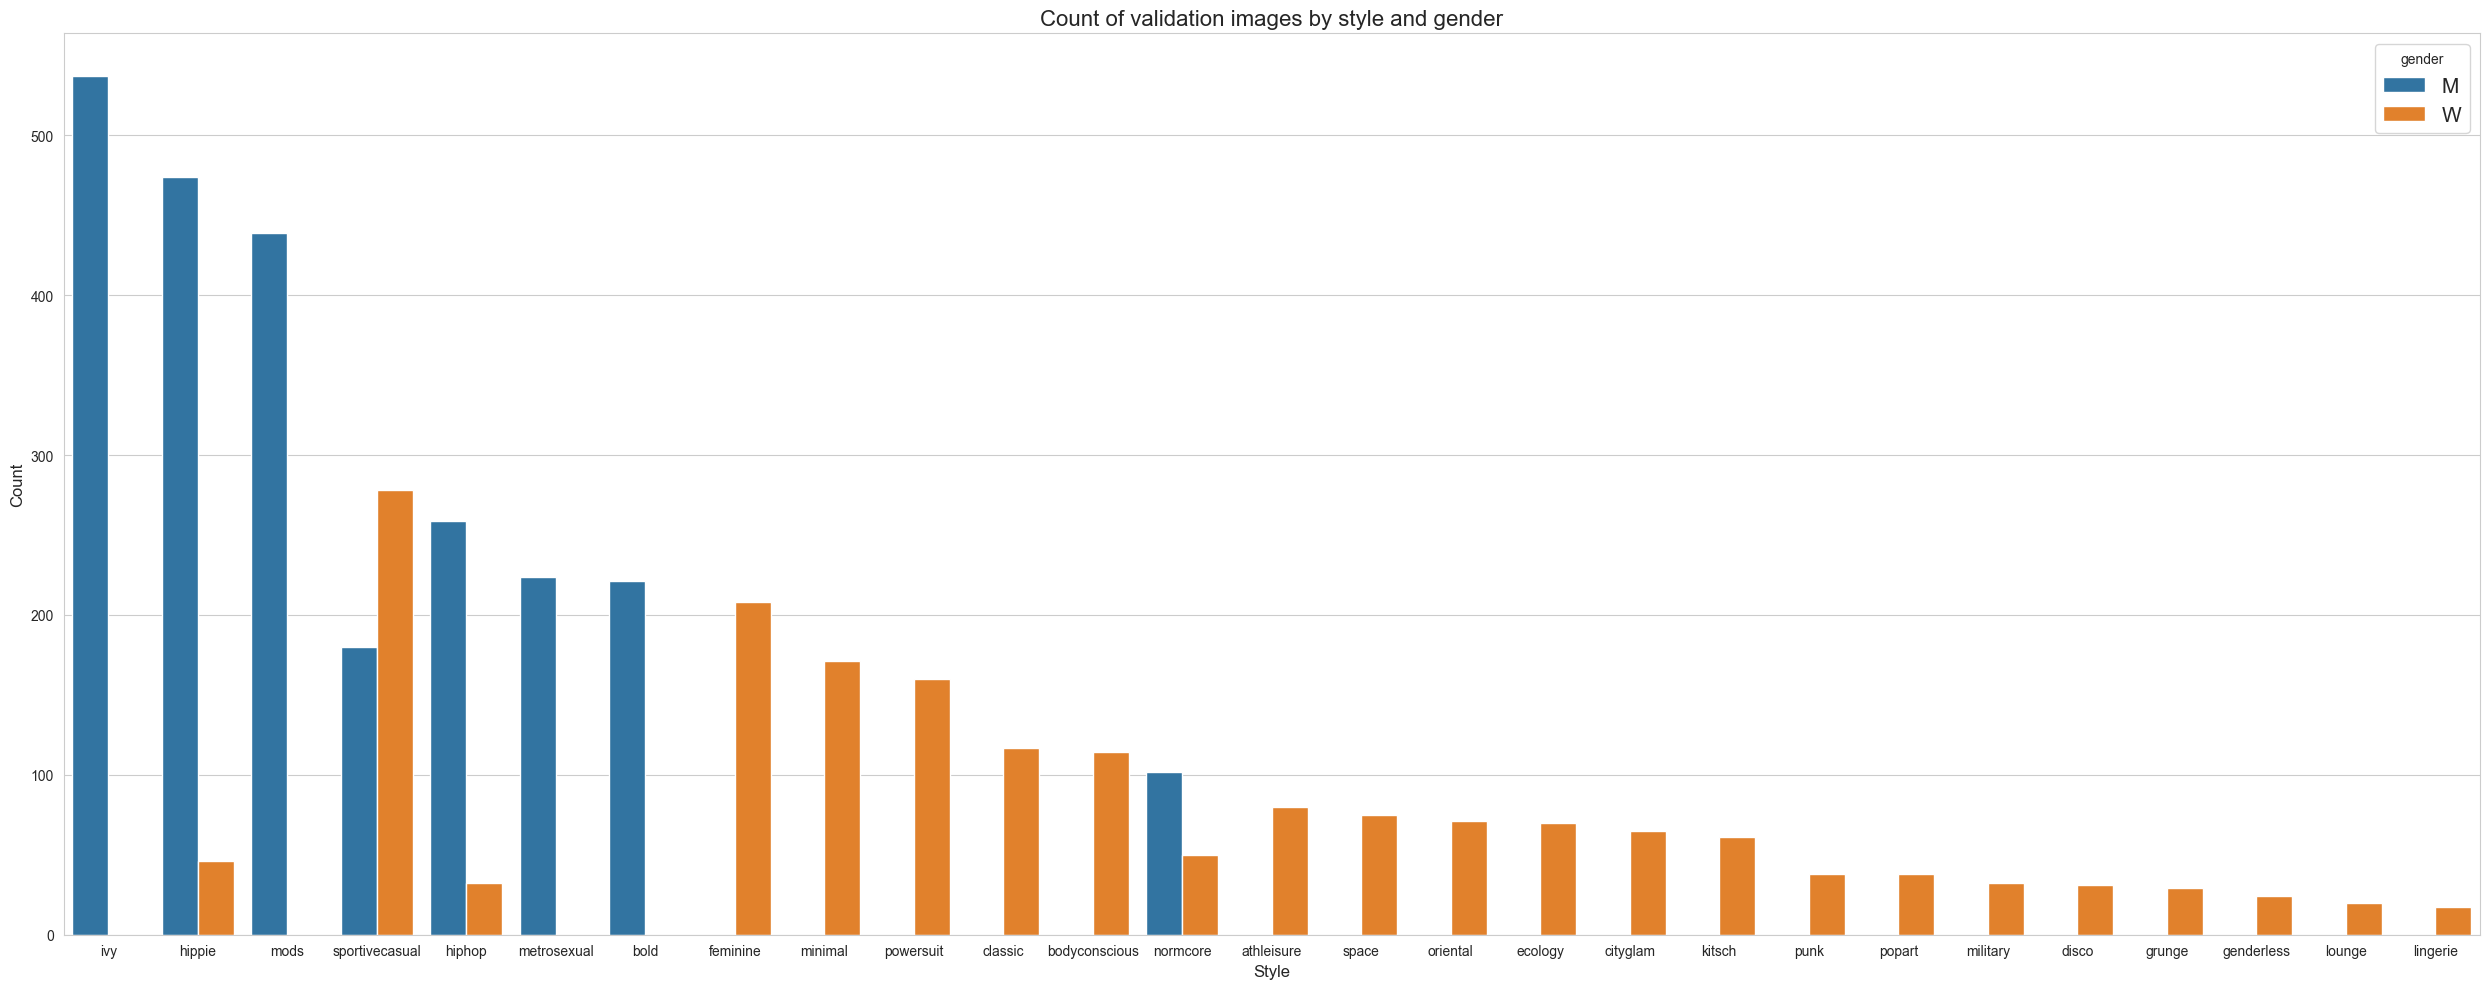

In [17]:
train_df = plot_metadata(train_label_metadata, title_name='train')
val_df = plot_metadata(val_label_metadata, title_name='validation')

In [20]:
# 결과 확인
train_df = train_df.groupby(by=['gender', 'style']).sum()
train_df

count
gender style                
M      bold             1144
       hiphop           1321
       hippie           1571
       ivy              1719
       metrosexual      1226
       mods             1616
       normcore         1096
       sportivecasual   1657
W      athleisure        424
       bodyconscious     500
       cityglam          329
       classic           504
       disco             141
       ecology           295
       feminine          762
       genderless        234
       grunge            122
       hiphop            243
       hippie            339
       kitsch            374
       lingerie          188
       lounge            207
       military          115
       minimal           780
       normcore          646
       oriental          369
       popart            195
       powersuit         623
       punk              237
       space             184
       sportivecasual   1143

In [21]:
val_df = val_df.groupby(by=['gender', 'style']).sum()
val_df

count
gender style                
M      bold              221
       hiphop            259
       hippie            474
       ivy               537
       metrosexual       224
       mods              439
       normcore          102
       sportivecasual    180
W      athleisure         80
       bodyconscious     114
       cityglam           65
       classic           117
       disco              31
       ecology            70
       feminine          208
       genderless         24
       grunge             29
       hiphop             32
       hippie             46
       kitsch             61
       lingerie           17
       lounge             20
       military           32
       minimal           171
       normcore           50
       oriental           71
       popart             38
       powersuit         160
       punk               38
       space              75
       sportivecasual    278

In [22]:
# 정보를 csv 파일로 저장
train_df.to_csv('./train_mission2-1.csv')
val_df.to_csv('./val_mission2-1.csv')